In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [6]:
df = sns.load_dataset('iris')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df = df[["sepal_length", "petal_length", "species"]]

In [9]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [10]:
df["species"] = LabelEncoder().fit_transform(df["species"])

In [11]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [12]:
df["species"].unique()

array([0, 1, 2])

In [13]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train )
y_pred_test = clf.predict(X_test)

In [23]:
print("Accuracy of test", accuracy_score(y_test, y_pred_test))
print("Accuracy of train", accuracy_score(y_train, y_pred_train))

Accuracy of test 1.0
Accuracy of train 0.9428571428571428


#### Confusion Matrix of Test data

In [25]:
confusion_matrix(y_test, y_pred_test)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [26]:
pd.DataFrame(confusion_matrix(y_test, y_pred_test))

,0,1,2
0,19,0,0
1,0,13,0
2,0,0,13


#### Confusion Matrix of Train data

In [24]:
confusion_matrix(y_train, y_pred_train)

array([[31,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 34]], dtype=int64)

In [27]:
pd.DataFrame(confusion_matrix(y_train, y_pred_train))

,0,1,2
0,31,0,0
1,0,34,3
2,0,3,34


In [30]:
querry = np.array([[3.4, 5.6]])
print("Probability of classes",clf.predict_proba(querry))
print("Prediction of a class",clf.predict(querry))

Probability of classes [[4.11586015e-05 1.39494013e-02 9.86009440e-01]]
Prediction of a class [2]


C:\Users\Babar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Babar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


C:\Users\Babar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


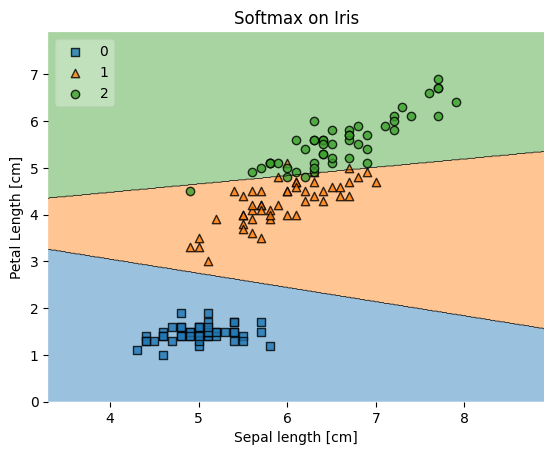

In [33]:
plot_decision_regions(X.values, y.values, clf, legend=2)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal Length [cm]")
plt.title("Softmax on Iris")
plt.show();